Задание 1

Попробуем определить тип популяции опоссумов по их размерам. Для работы используйте набор данных “possum.csv”, приложенный к материалам занятия.
Для выполнения задания:

Выберите и оставьте числовые признаки, по которым будете определять тип животных, и целевую переменную - Рор
Закодируйте значения по столбцу Рор в 0 и 1 (можно использовать метод LabelEncoder)
Разделите данные на выборку для обучения и тестирования (в соотношении 80 - тренировочная, 20 - тестовая)
Постройте модель LDA
Рассчитайте точность вашей модели на тестовой выборке

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df_possum = pd.read_csv('possum.csv')
df_possum.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [24]:
df_possum = df_possum.drop(columns = ['case', 'site', 'sex', 'age'], axis = 1)
df_possum.head()

,Pop,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,Vic,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,Vic,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,Vic,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,Vic,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,Vic,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [25]:
df_possum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pop       104 non-null    object 
 1   hdlngth   104 non-null    float64
 2   skullw    104 non-null    float64
 3   totlngth  104 non-null    float64
 4   taill     104 non-null    float64
 5   footlgth  103 non-null    float64
 6   earconch  104 non-null    float64
 7   eye       104 non-null    float64
 8   chest     104 non-null    float64
 9   belly     104 non-null    float64
dtypes: float64(9), object(1)
memory usage: 8.3+ KB


Типы данных все соответсвуют в столбцах, в footlgth есть 1 пропуск, т.к. он числовой, не временной и данных у нас не очень много, мы сможем заполнить пропуск медианой.

In [26]:
df_possum.describe()

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


Можем предварительно проанализировать наши данные по описательной статистике и сказать, что все данные скорее всего будут иметь распределение близкое к нормальному, т.к. среднее значение и 2-й квартиль одинаковые у всех. Также, смотря на размах и различия между минимум и 1-м квартилем и максимумом и 3-м квартилем, можно предположить, что в наших данных не наблюдается выбросов. 

In [28]:
# Заполним пропуск 
footlgth_median = df_possum['footlgth'].median()
df_possum['footlgth'] = df_possum['footlgth'].fillna(footlgth_median)

df_possum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pop       104 non-null    object 
 1   hdlngth   104 non-null    float64
 2   skullw    104 non-null    float64
 3   totlngth  104 non-null    float64
 4   taill     104 non-null    float64
 5   footlgth  104 non-null    float64
 6   earconch  104 non-null    float64
 7   eye       104 non-null    float64
 8   chest     104 non-null    float64
 9   belly     104 non-null    float64
dtypes: float64(9), object(1)
memory usage: 8.3+ KB


In [29]:
df_possum.describe()

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,92.602885,56.883654,87.088462,37.009615,68.454808,48.130769,15.046154,27.000000,32.586538
std,3.573349,3.113426,4.310549,1.959518,4.374149,4.109380,1.050374,2.045597,2.761949
min,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,90.675000,54.975000,84.000000,35.875000,64.650000,44.800000,14.400000,25.500000,31.000000
50%,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


Описательная статистика после заполнения пропусков не изменилась, следовательно, пропуски были заполнены верно

In [32]:
# Кодируем данные столбца Pop в бинарную систему 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_possum['Pop'] = le.fit_transform(df_possum['Pop'])

df_possum.head()

,Pop,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [38]:
# Построение модели
# Разделяем выборку на тестовую и тренировочную, стараясь равномерно распределить оба класса по выборкам
from sklearn.model_selection import train_test_split

x = df_possum.drop(columns = ['Pop'])
y = df_possum['Pop']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [46]:
# Строим модель линейного дискриминантного анализа
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

In [47]:
# Обучаем модель LDA
lda.fit(x_train, y_train)

,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,False
,tol,0.0001
,covariance_estimator,None


In [49]:
# Делаем прогноз
from sklearn.metrics import classification_report

lda_predictions = lda.predict(x_test)
print(classification_report(y_test, lda_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        12

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



Опираясь на оценку модели, можно сказать, что оба класса определены с точностью 100 %. Все 21 объект нашей выборки предсказан правильно, наша модель сработала идеально. Мое предполжение, что так могла произойти из-а того, что у нас небольшое кол-во данных в выборке и объекты, характеризующие 2 класса сильно различаются друг от друга

Задание 2
Теперь кластеризируем страны на основании показателей импорта и экспорта. Для работы используйте набор данных “Country-data.csv”, приложенный к материалам занятия.
Для выполнения задания:

Выберите и оставьте только те признаки, по которым будете проводить кластерный анализ.
Подберите оптимальное число кластеров для алгоритма K-means.
Визуализируйте полученную кластеризацию.
Проверьте правильность выбора кластеров с помощью метода локтя.
Примените алгомеративную кластеризацию с учётом рассчитанного методом локтя оптимального количества кластеров.
Визуализируйте результат.

In [102]:
df_country = pd.read_csv('Country-data.csv')
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [103]:
df_country = df_country.loc[:, ['country', 'exports', 'imports']]
df_country.head()

,country,exports,imports
0,Afghanistan,10.0,44.9
1,Albania,28.0,48.6
2,Algeria,38.4,31.4
3,Angola,62.3,42.9
4,Antigua and Barbuda,45.5,58.9


In [104]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  167 non-null    object 
 1   exports  167 non-null    float64
 2   imports  167 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.0+ KB


Типы столбцов определены верно, нет пропущенных данных

In [105]:
df_country.describe()

,exports,imports
count,167.000000,167.000000
mean,41.108976,46.890215
std,27.412010,24.209589
min,0.109000,0.065900
25%,23.800000,30.200000
50%,35.000000,43.300000
75%,51.350000,58.750000
max,200.000000,174.000000


Можно сделать предварительные выводы, опираясь на описательную статистику. Скорее всего, распределения данных показателей не будут близки к нормальным, т.к. среднее значение и 2-й квартиль не совпадают. Судя по большому различию между 3-м квартилем и максимум, скорее всего, будут выбросы

In [106]:
# Выделяем выборку для кластеризации

x = df_country.drop(columns = ['country']).values

In [107]:
# Проводим масштабирование данных, т.к. k-means чувствительно к масштабу
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

/var/folders/dn/zwr5h4y129gdz0vh13yd5vgr0000gp/T/ipykernel_51476/1850333276.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(K_range, inertias, 'bo-', marker='o')


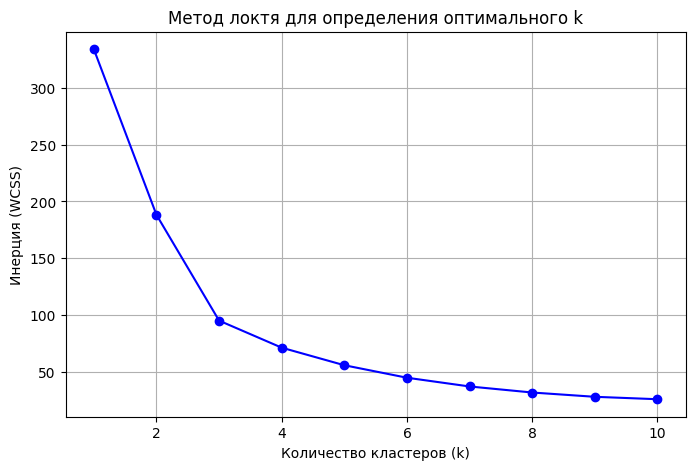

In [108]:
# Подбираем оптимальное кол-во k по методу локтя
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, 'bo-', marker='o')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Инерция (WCSS)')
plt.title('Метод локтя для определения оптимального k')
plt.grid(True)
plt.show()

Опираясь на график, можно сказать, что оптимальное кол-во k = 4

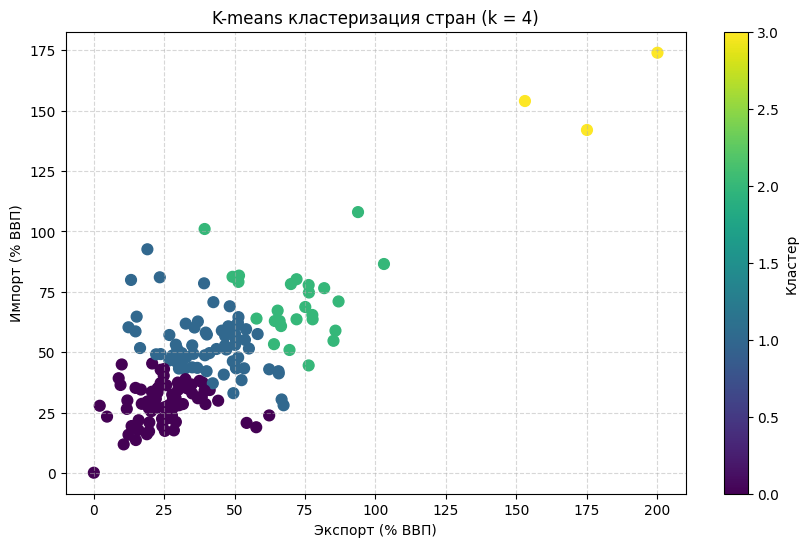

In [114]:
# Проведение кластеризации 
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_country['kmeans_cluster'] = kmeans.fit_predict(x_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_country['exports'], 
    df_country['imports'], 
    c=df_country['kmeans_cluster'], 
    cmap='viridis', 
    s=60
)
plt.xlabel('Экспорт (% ВВП)')
plt.ylabel('Импорт (% ВВП)')
plt.title(f'K-means кластеризация стран (k = {optimal_k})')
plt.colorbar(scatter, label='Кластер')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

У нас получилось 4 кластера:
1) Низкий экспорт и низкий импорт
2) Средний экспорт и средний импорт
3) Высокий экспорт и высокий импорт
4) Очень высокий экспорт и очень высокий импорт (не исключен выброс)

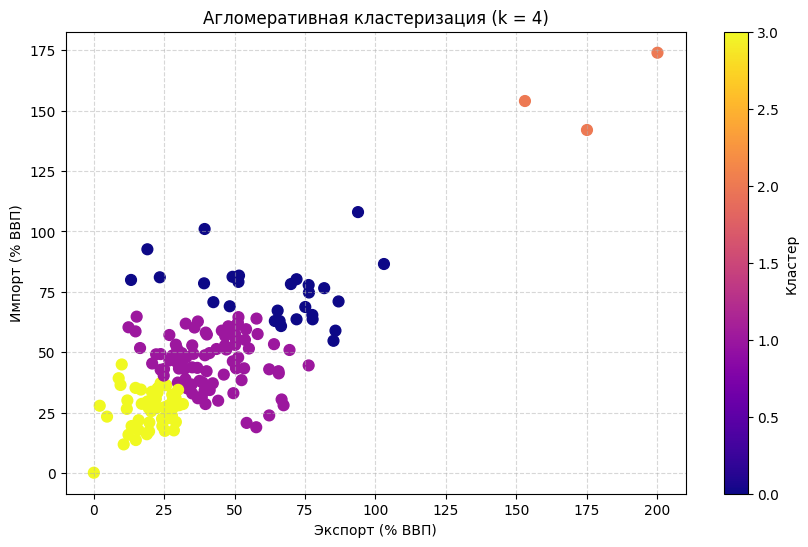

In [111]:
# Алгомеративная кластеризация
agglo = AgglomerativeClustering(n_clusters=optimal_k)
df_country['agglo_cluster'] = agglo.fit_predict(x_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_country['exports'], 
    df_country['imports'], 
    c=df_country['agglo_cluster'], 
    cmap='plasma', 
    s=60
)
plt.xlabel('Экспорт (% ВВП)')
plt.ylabel('Импорт (% ВВП)')
plt.title(f'Агломеративная кластеризация (k = {optimal_k})')
plt.colorbar(scatter, label='Кластер')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


С помощью алгомеративной кластеризации мы получили такие же типы кластеров, как и при k-means